# ഒരു വർഗ്ഗീകരണ മോഡൽ നിർമ്മിക്കുക: രുചികരമായ ഏഷ്യൻ மற்றும் ഇന്ത്യൻ ഭക്ഷണങ്ങൾ


## Cuisine classifiers 1

ഈ പാഠത്തിൽ, നാം ഒരു ഗ്രൂപ്പ് ഘടകങ്ങളുടെ അടിസ്ഥാനത്തിൽ ഒരു നിശ്ചിത ദേശീയ ഭക്ഷണശൈലി പ്രവചിക്കാൻ വിവിധ ക്ലാസിഫയർസുകൾ പരിശോധിക്കും. ഇതു ചെയ്യുമ്പോൾ, ക്ലാസിഫിക്കേഷൻ പ്രവർത്തനങ്ങൾക്ക് ആൽഗോരിതങ്ങൾ എങ്ങനെ ഉപയോഗിക്കാമെന്ന് കുറച്ച് കൂടുതൽ പഠിക്കും.

### [**പ്രീ-ലെക്ചർ ക്വിസ്**](https://gray-sand-07a10f403.1.azurestaticapps.net/quiz/21/)

### **തയാറെടുപ്പ്**

ഈ പാഠം നമ്മുടെ [മുൻപത്തെ പാഠം](https://github.com/microsoft/ML-For-Beginners/blob/main/4-Classification/1-Introduction/solution/lesson_10-R.ipynb) അടിസ്ഥാനമാക്കി നിർമ്മിച്ചിരിക്കുന്നു, അവിടെ:

-   ഏഷ്യയും ഇന്ത്യയും ഉൾപ്പെടെയുള്ള എല്ലാ മനോഹരമായ ഭക്ഷണശൈലികളെക്കുറിച്ചുള്ള ഡാറ്റാസെറ്റിന്റെ സഹായത്തോടെ ക്ലാസിഫിക്കേഷനുകൾക്ക് ഒരു സൗമ്യമായ പരിചയം നൽകി 😋.

-   ഡാറ്റ തയ്യാറാക്കാനും ശുദ്ധീകരിക്കാനും ചില [dplyr ക്രിയകൾ](https://dplyr.tidyverse.org/) പരിശോധിച്ചു.

-   ggplot2 ഉപയോഗിച്ച് മനോഹരമായ ദൃശ്യവത്കരണങ്ങൾ നിർമ്മിച്ചു.

-   അസമതുലിത ഡാറ്റ കൈകാര്യം ചെയ്യുന്നതിന് [recipes](https://recipes.tidymodels.org/articles/Simple_Example.html) ഉപയോഗിച്ച് പ്രീപ്രോസസ്സിംഗ് എങ്ങനെ ചെയ്യാമെന്ന് കാണിച്ചു.

-   നമ്മുടെ റെസിപ്പി `prep` ചെയ്ത് `bake` ചെയ്യുന്നതിലൂടെ അത് ഉദ്ദേശിച്ച പോലെ പ്രവർത്തിക്കുന്നുണ്ടെന്ന് സ്ഥിരീകരിച്ചു.

#### **ആവശ്യമായ മുൻപരിചയം**

ഈ പാഠത്തിനായി, ഡാറ്റ ശുദ്ധീകരിക്കാനും, തയ്യാറാക്കാനും, ദൃശ്യവത്കരിക്കാനും താഴെപ്പറയുന്ന പാക്കേജുകൾ ആവശ്യമാണ്:

-   `tidyverse`: [tidyverse](https://www.tidyverse.org/) ഒരു [R പാക്കേജുകളുടെ സമാഹാരമാണ്](https://www.tidyverse.org/packages) ഡാറ്റാ സയൻസ് വേഗത്തിലും എളുപ്പത്തിലും രസകരവുമാക്കാൻ!

-   `tidymodels`: [tidymodels](https://www.tidymodels.org/) ഫ്രെയിംവർക്ക് മോഡലിംഗ്, മെഷീൻ ലേണിങ്ങിനുള്ള [പാക്കേജുകളുടെ സമാഹാരമാണ്](https://www.tidymodels.org/packages/).

-   `themis`: [themis പാക്കേജ്](https://themis.tidymodels.org/) അസമതുലിത ഡാറ്റ കൈകാര്യം ചെയ്യുന്നതിനുള്ള അധിക റെസിപ്പി ഘട്ടങ്ങൾ നൽകുന്നു.

-   `nnet`: [nnet പാക്കേജ്](https://cran.r-project.org/web/packages/nnet/nnet.pdf) ഒറ്റ ഹിഡൻ ലെയർ ഉള്ള ഫീഡ്-ഫോർവേഡ് ന്യൂറൽ നെറ്റ്വർക്കുകളും, മൾട്ടിനോമിയൽ ലോജിസ്റ്റിക് റെഗ്രഷൻ മോഡലുകളും കണക്കാക്കാൻ ഫംഗ്ഷനുകൾ നൽകുന്നു.

നിങ്ങൾക്ക് ഇവ ഇന്സ്റ്റാൾ ചെയ്യാം:


`install.packages(c("tidyverse", "tidymodels", "DataExplorer", "here"))`

മറ്റൊരു വഴിയായി, താഴെ കൊടുത്തിരിക്കുന്ന സ്ക്രിപ്റ്റ് ഈ മോഡ്യൂൾ പൂർത്തിയാക്കാൻ ആവശ്യമായ പാക്കേജുകൾ നിങ്ങൾക്കുണ്ടോ എന്ന് പരിശോധിച്ച് അവ ഇല്ലെങ്കിൽ അവ ഇൻസ്റ്റാൾ ചെയ്യുന്നു.


In [2]:
suppressWarnings(if (!require("pacman"))install.packages("pacman"))

pacman::p_load(tidyverse, tidymodels, themis, here)

Loading required package: pacman



ഇപ്പോൾ, നമുക്ക് തുടക്കം കുറിക്കാം!

## 1. ഡാറ്റയെ പരിശീലനവും പരിശോധനാ സെറ്റുകളായി വിഭജിക്കുക.

നമ്മുടെ മുൻപത്തെ പാഠത്തിൽ നിന്നുള്ള ചില ഘട്ടങ്ങൾ തിരഞ്ഞെടുക്കുന്നതിലൂടെ നമുക്ക് തുടങ്ങാം.

### വ്യത്യസ്ത പാചകശൈലികൾ തമ്മിൽ ആശയക്കുഴപ്പം സൃഷ്ടിക്കുന്ന ഏറ്റവും സാധാരണമായ ഘടകങ്ങൾ `dplyr::select()` ഉപയോഗിച്ച് ഒഴിവാക്കുക.

എല്ലാവർക്കും അരി, വെളുത്തുള്ളി, ഇഞ്ചി ഇഷ്ടമാണ്!


In [3]:
# Load the original cuisines data
df <- read_csv(file = "https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/4-Classification/data/cuisines.csv")

# Drop id column, rice, garlic and ginger from our original data set
df_select <- df %>% 
  select(-c(1, rice, garlic, ginger)) %>%
  # Encode cuisine column as categorical
  mutate(cuisine = factor(cuisine))

# Display new data set
df_select %>% 
  slice_head(n = 5)

# Display distribution of cuisines
df_select %>% 
  count(cuisine) %>% 
  arrange(desc(n))

New names:
* `` -> ...1

Rows: 2448 Columns: 385

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): cuisine
dbl (384): ...1, almond, angelica, anise, anise_seed, apple, apple_brandy, a...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
indian,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0


cuisine,n
<fct>,<int>
korean,799
indian,598
chinese,442
japanese,320
thai,289


Perfect! ഇപ്പോൾ, ഡാറ്റ 70% പരിശീലനത്തിനും 30% പരിശോധനയ്ക്കും വിഭജിക്കാനുള്ള സമയം. പരിശീലനവും പരിശോധനാ ഡാറ്റാസെറ്റുകളിലും ഓരോ ക്യൂസിനിയുടെ അനുപാതം നിലനിർത്താൻ `stratification` സാങ്കേതിക വിദ്യയും ഉപയോഗിക്കും.

[Tidymodels-ലെ ഒരു പാക്കേജ് ആയ rsample](https://rsample.tidymodels.org/) കാര്യക്ഷമമായ ഡാറ്റ വിഭജനം, റീസാമ്പ്ലിംഗ് എന്നിവയ്ക്കുള്ള അടിസ്ഥാനസൗകര്യം നൽകുന്നു:


In [4]:
# Load the core Tidymodels packages into R session
library(tidymodels)

# Create split specification
set.seed(2056)
cuisines_split <- initial_split(data = df_select,
                                strata = cuisine,
                                prop = 0.7)

# Extract the data in each split
cuisines_train <- training(cuisines_split)
cuisines_test <- testing(cuisines_split)

# Print the number of cases in each split
cat("Training cases: ", nrow(cuisines_train), "\n",
    "Test cases: ", nrow(cuisines_test), sep = "")

# Display the first few rows of the training set
cuisines_train %>% 
  slice_head(n = 5)


# Display distribution of cuisines in the training set
cuisines_train %>% 
  count(cuisine) %>% 
  arrange(desc(n))

Training cases: 1712
Test cases: 736

cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,⋯,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chinese,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


cuisine,n
<fct>,<int>
korean,559
indian,418
chinese,309
japanese,224
thai,202


## 2. അസമതുല്യമായ ഡാറ്റ കൈകാര്യം ചെയ്യുക

മൂല ഡാറ്റ സെറ്റിലും നമ്മുടെ പരിശീലന സെറ്റിലും നിങ്ങൾ ശ്രദ്ധിച്ചിരിക്കാം, വിഭവങ്ങളുടെ എണ്ണം വളരെ അസമതുല്യമായി വിതരണം ചെയ്തിരിക്കുന്നു. കൊറിയൻ വിഭവങ്ങൾ തായ് വിഭവങ്ങളേക്കാൾ *ഏകദേശം* 3 മടങ്ങ് കൂടുതലാണ്. അസമതുല്യമായ ഡാറ്റ മോഡൽ പ്രകടനത്തിൽ നെഗറ്റീവ് ഫലങ്ങൾ ഉണ്ടാക്കാറുണ്ട്. നിരീക്ഷണങ്ങളുടെ എണ്ണം സമമാണ് എങ്കിൽ പല മോഡലുകളും മികച്ച പ്രകടനം കാണിക്കുന്നു, അതിനാൽ അസമതുല്യമായ ഡാറ്റയുമായി അവർ ബുദ്ധിമുട്ടുന്നു.

അസമതുല്യമായ ഡാറ്റ സെറ്റുകൾ കൈകാര്യം ചെയ്യാനുള്ള പ്രധാനമായ രണ്ട് മാർഗ്ഗങ്ങൾ ഉണ്ട്:

-   ന്യൂനപക്ഷ ക്ലാസ്സിൽ നിരീക്ഷണങ്ങൾ ചേർക്കൽ: `ഓവർ-സാമ്പ്ലിംഗ്` ഉദാഹരണത്തിന് SMOTE ആൽഗോരിതം ഉപയോഗിച്ച്, ഇത് ഈ കേസുകളുടെ അടുത്തുള്ള അയൽക്കാരെ ഉപയോഗിച്ച് ന്യൂനപക്ഷ ക്ലാസ്സിന്റെ പുതിയ ഉദാഹരണങ്ങൾ സിന്തറ്റിക്കായി സൃഷ്ടിക്കുന്നു.

-   ഭൂരിപക്ഷ ക്ലാസ്സിൽ നിന്നുള്ള നിരീക്ഷണങ്ങൾ നീക്കംചെയ്യൽ: `അണ്ടർ-സാമ്പ്ലിംഗ്`

മുൻപത്തെ പാഠത്തിൽ, `recipe` ഉപയോഗിച്ച് അസമതുല്യമായ ഡാറ്റ സെറ്റുകൾ കൈകാര്യം ചെയ്യുന്നത് എങ്ങനെ എന്ന് ഞങ്ങൾ കാണിച്ചു. ഒരു recipe ഒരു ബ്ലൂപ്രിന്റ് പോലെ കരുതാം, അത് ഒരു ഡാറ്റ സെറ്റിൽ ഏത് ഘട്ടങ്ങൾ പ്രയോഗിക്കണമെന്ന് വിവരിക്കുന്നു, ഡാറ്റ വിശകലനത്തിന് തയ്യാറാക്കാൻ. നമ്മുടെ കേസിൽ, `training set`-ലുള്ള വിഭവങ്ങളുടെ എണ്ണം സമമായി വിതരണം ചെയ്യാൻ ആഗ്രഹിക്കുന്നു. നമുക്ക് ഉടൻ തന്നെ തുടങ്ങാം.


In [5]:
# Load themis package for dealing with imbalanced data
library(themis)

# Create a recipe for preprocessing training data
cuisines_recipe <- recipe(cuisine ~ ., data = cuisines_train) %>% 
  step_smote(cuisine)

# Print recipe
cuisines_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor        380

Operations:

SMOTE based on cuisine

നിങ്ങൾക്ക് തീർച്ചയായും മുന്നോട്ട് പോയി സ്ഥിരീകരിക്കാം (prep+bake ഉപയോഗിച്ച്) റെസിപ്പി നിങ്ങൾ പ്രതീക്ഷിക്കുന്നതുപോലെ പ്രവർത്തിക്കും എന്ന് - എല്ലാ ക്യൂസീൻ ലേബലുകൾക്കും `559` നിരീക്ഷണങ്ങൾ ഉള്ളത്.

നാം ഈ റെസിപ്പി മോഡലിംഗ് പ്രീപ്രോസസറായി ഉപയോഗിക്കാനിരിക്കുന്നതിനാൽ, ഒരു `workflow()` ഞങ്ങൾക്ക് എല്ലാ prep ഉം bake ഉം ചെയ്യും, അതിനാൽ നമുക്ക് റെസിപ്പി മാനുവലായി അളക്കേണ്ടതില്ല.

ഇപ്പോൾ നാം ഒരു മോഡൽ പരിശീലിപ്പിക്കാൻ തയ്യാറാണ് 👩‍💻👨‍💻!

## 3. നിങ്ങളുടെ ക്ലാസിഫയർ തിരഞ്ഞെടുക്കൽ

<p >
   <img src="../../../../../../translated_images/parsnip.cd2ce92622976502.ml.jpg"
   width="600"/>
   <figcaption>Artwork by @allison_horst</figcaption>


ഇപ്പോൾ നമുക്ക് ജോലിക്ക് ഏത് ആൽഗോരിതം ഉപയോഗിക്കണമെന്ന് തീരുമാനിക്കണം 🤔.

Tidymodels-ൽ, [`parsnip package`](https://parsnip.tidymodels.org/index.html) വിവിധ എഞ്ചിനുകളിലുടനീളം (പാക്കേജുകൾ) മോഡലുകളുമായി പ്രവർത്തിക്കാൻ സ്ഥിരമായ ഇന്റർഫേസ് നൽകുന്നു. ദയവായി parsnip ഡോക്യുമെന്റേഷൻ കാണുക [model types & engines](https://www.tidymodels.org/find/parsnip/#models) ഉം അവയുടെ അനുബന്ധ [model arguments](https://www.tidymodels.org/find/parsnip/#model-args) ഉം അന്വേഷിക്കാൻ. ആദ്യ കാഴ്ചയിൽ വൈവിധ്യം വളരെ ആശ്ചര്യപ്പെടുത്തുന്നതാണ്. ഉദാഹരണത്തിന്, താഴെപ്പറയുന്ന രീതികൾ എല്ലാം ക്ലാസിഫിക്കേഷൻ സാങ്കേതികവിദ്യകൾ ഉൾക്കൊള്ളുന്നു:

-   C5.0 Rule-Based Classification Models

-   Flexible Discriminant Models

-   Linear Discriminant Models

-   Regularized Discriminant Models

-   Logistic Regression Models

-   Multinomial Regression Models

-   Naive Bayes Models

-   Support Vector Machines

-   Nearest Neighbors

-   Decision Trees

-   Ensemble methods

-   Neural Networks

പട്ടിക തുടരുന്നു!

### **ഏത് ക്ലാസിഫയർ തിരഞ്ഞെടുക്കണം?**

അപ്പോൾ, ഏത് ക്ലാസിഫയർ തിരഞ്ഞെടുക്കണം? പലതും പരീക്ഷിച്ച് നല്ല ഫലം കാണുന്നത് ഒരു പരീക്ഷണ മാർഗമാണ്.

> AutoML ഈ പ്രശ്നം ക്ലൗഡിൽ ഈ താരതമ്യങ്ങൾ നടത്തിക്കൊണ്ട് സുതാര്യമായി പരിഹരിക്കുന്നു, നിങ്ങളുടെ ഡാറ്റയ്ക്ക് ഏറ്റവും അനുയോജ്യമായ ആൽഗോരിതം തിരഞ്ഞെടുക്കാൻ അനുവദിക്കുന്നു. ഇതു [ഇവിടെ](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott) പരീക്ഷിക്കുക

ക്ലാസിഫയർ തിരഞ്ഞെടുപ്പ് നമ്മുടെ പ്രശ്നത്തെ ആശ്രയിച്ചിരിക്കുന്നു. ഉദാഹരണത്തിന്, ഫലം `രണ്ടിലധികം ക്ലാസുകളായി` വർഗ്ഗീകരിക്കാവുന്നപ്പോൾ, നമ്മുടെ കേസിൽപോലെ, നിങ്ങൾ `ബൈനറി ക്ലാസിഫിക്കേഷനിൽ` പകരം `മൾട്ടിക്ലാസ് ക്ലാസിഫിക്കേഷൻ ആൽഗോരിതം` ഉപയോഗിക്കണം.

### **മികച്ച സമീപനം**

വൈല്ഡ് ഗസ്സ് ചെയ്യുന്നതിന് പകരം, ഡൗൺലോഡ് ചെയ്യാവുന്ന [ML Cheat sheet](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott) ൽ ഉള്ള ആശയങ്ങൾ പിന്തുടരുക. ഇവിടെ, നമ്മുടെ മൾട്ടിക്ലാസ് പ്രശ്നത്തിന് ചില തിരഞ്ഞെടുപ്പുകൾ ഉണ്ട് എന്ന് കണ്ടെത്താം:

<p >
   <img src="../../../../../../translated_images/cheatsheet.07a475ea444d2223.ml.png"
   width="500"/>
   <figcaption>മൾട്ടിക്ലാസ് ക്ലാസിഫിക്കേഷൻ ഓപ്ഷനുകൾ വിശദീകരിക്കുന്ന മൈക്രോസോഫ്റ്റിന്റെ ആൽഗോരിതം ചീറ്റ് ഷീറ്റിന്റെ ഒരു ഭാഗം</figcaption>


### **കാരണം**

നമുക്ക് ഉള്ള നിയന്ത്രണങ്ങളെ അടിസ്ഥാനമാക്കി വ്യത്യസ്ത സമീപനങ്ങൾ വഴി നാം ചിന്തിക്കാമോ എന്ന് നോക്കാം:

-   **ഡീപ്പ് ന്യൂറൽ നെറ്റ്വർക്കുകൾ വളരെ ഭാരമുള്ളവയാണ്**. നമ്മുടെ ശുദ്ധവും കുറഞ്ഞ ഡാറ്റാസെറ്റും, നോട്ട്ബുക്കുകൾ വഴി ലോക്കലായി ട്രെയിനിംഗ് നടത്തുന്നതും പരിഗണിച്ചാൽ, ഡീപ്പ് ന്യൂറൽ നെറ്റ്വർക്കുകൾ ഈ ജോലിക്ക് വളരെ ഭാരമുള്ളവയാണ്.

-   **രണ്ടു-ക്ലാസ് ക്ലാസിഫയർ ഉപയോഗിക്കില്ല**. നാം രണ്ട്-ക്ലാസ് ക്ലാസിഫയർ ഉപയോഗിക്കുന്നില്ല, അതിനാൽ ഒന്ന്-വേഴ്സ്-ആൾൽ ഒഴിവാക്കാം.

-   **ഡിസിഷൻ ട്രീ അല്ലെങ്കിൽ ലോജിസ്റ്റിക് റെഗ്രഷൻ പ്രവർത്തിക്കാം**. ഒരു ഡിസിഷൻ ട്രീ പ്രവർത്തിക്കാം, അല്ലെങ്കിൽ മൾട്ടിനോമിയൽ റെഗ്രഷൻ/മൾട്ടിക്ലാസ് ലോജിസ്റ്റിക് റെഗ്രഷൻ മൾട്ടിക്ലാസ് ഡാറ്റയ്ക്ക്.

-   **മൾട്ടിക്ലാസ് ബൂസ്റ്റഡ് ഡിസിഷൻ ട്രീസ് വ്യത്യസ്ത പ്രശ്നം പരിഹരിക്കുന്നു**. മൾട്ടിക്ലാസ് ബൂസ്റ്റഡ് ഡിസിഷൻ ട്രീ സാധാരണയായി നോൺപാരാമെട്രിക് ടാസ്കുകൾക്ക് അനുയോജ്യമാണ്, ഉദാ: റാങ്കിംഗ് നിർമ്മിക്കാൻ രൂപകൽപ്പന ചെയ്ത ടാസ്കുകൾ, അതിനാൽ ഇത് നമുക്ക് ഉപയോഗപ്രദമല്ല.

പലപ്പോഴും കൂടുതൽ സങ്കീർണ്ണമായ മെഷീൻ ലേണിംഗ് മോഡലുകൾ (ഉദാ: എൻസംബിൾ മെത്തഡുകൾ) ആരംഭിക്കുന്നതിന് മുമ്പ്, ഏറ്റവും ലളിതമായ മോഡൽ നിർമ്മിച്ച് അവസ്ഥ മനസ്സിലാക്കുന്നത് നല്ലതാണ്. അതിനാൽ ഈ പാഠത്തിനായി, നാം `മൾട്ടിനോമിയൽ റെഗ്രഷൻ` മോഡലിൽ നിന്ന് ആരംഭിക്കാം.

> ലോജിസ്റ്റിക് റെഗ്രഷൻ ഫലം വർഗ്ഗീയമായ (അഥവാ നോമിനൽ) വേരിയബിൾ ആയപ്പോൾ ഉപയോഗിക്കുന്ന സാങ്കേതിക വിദ്യയാണ്. ബൈനറി ലോജിസ്റ്റിക് റെഗ്രഷനിൽ ഫലം വേരിയബിളുകളുടെ എണ്ണം രണ്ട് ആണ്, എന്നാൽ മൾട്ടിനോമിയൽ ലോജിസ്റ്റിക് റെഗ്രഷനിൽ ഫലം വേരിയബിളുകളുടെ എണ്ണം രണ്ട് കണക്കിന് കൂടുതലാണ്. കൂടുതൽ വായനയ്ക്ക് [Advanced Regression Methods](https://bookdown.org/chua/ber642_advanced_regression/multinomial-logistic-regression.html) കാണുക.

## 4. മൾട്ടിനോമിയൽ ലോജിസ്റ്റിക് റെഗ്രഷൻ മോഡൽ ട്രെയിൻ ചെയ്ത് മൂല്യനിർണ്ണയം ചെയ്യുക.

Tidymodels-ൽ, `parsnip::multinom_reg()` ഒരു മോഡൽ നിർവചിക്കുന്നു, ഇത് ലീനിയർ പ്രഡിക്ടറുകൾ ഉപയോഗിച്ച് മൾട്ടിക്ലാസ് ഡാറ്റ പ്രവചിക്കാൻ മൾട്ടിനോമിയൽ വിതരണത്തെ ഉപയോഗിക്കുന്നു. ഈ മോഡൽ ഫിറ്റ് ചെയ്യാൻ നിങ്ങൾക്ക് ഉപയോഗിക്കാവുന്ന വ്യത്യസ്ത മാർഗ്ഗങ്ങൾ/എഞ്ചിനുകൾ അറിയാൻ `?multinom_reg()` കാണുക.

ഈ ഉദാഹരണത്തിന്, നാം ഡിഫോൾട്ട് [nnet](https://cran.r-project.org/web/packages/nnet/nnet.pdf) എഞ്ചിൻ വഴി മൾട്ടിനോമിയൽ റെഗ്രഷൻ മോഡൽ ഫിറ്റ് ചെയ്യും.

> `penalty`-യ്ക്ക് ഞാൻ ഒരു മൂല്യം യാദൃച്ഛികമായി തിരഞ്ഞെടുത്തു. ഈ മൂല്യം തിരഞ്ഞെടുക്കാനുള്ള മികച്ച മാർഗ്ഗങ്ങൾ ഉണ്ട്, അതായത് `resampling` ഉപയോഗിച്ച് മോഡൽ `tuning` ചെയ്യുന്നതിലൂടെ, അത് പിന്നീട് ചർച്ച ചെയ്യും.
>
> മോഡൽ ഹൈപ്പർപാരാമീറ്ററുകൾ എങ്ങനെ ട്യൂൺ ചെയ്യാമെന്ന് കൂടുതൽ അറിയാൻ [Tidymodels: Get Started](https://www.tidymodels.org/start/tuning/) കാണുക.


In [6]:
# Create a multinomial regression model specification
mr_spec <- multinom_reg(penalty = 1) %>% 
  set_engine("nnet", MaxNWts = 2086) %>% 
  set_mode("classification")

# Print model specification
mr_spec

Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


ശ്രേഷ്ഠം ജോലി 🥳! ഇനി നമുക്ക് ഒരു റെസിപ്പിയും ഒരു മോഡൽ സ്പെസിഫിക്കേഷനും ഉണ്ടാകുമ്പോൾ, അവയെ ഒന്നിച്ച് ബണ്ടിൽ ചെയ്ത് ഒരു ഒബ്ജക്റ്റായി രൂപപ്പെടുത്തേണ്ടതുണ്ട്, അത് ആദ്യം ഡാറ്റ പ്രീപ്രോസസ് ചെയ്ത് പിന്നീട് പ്രീപ്രോസസ് ചെയ്ത ഡാറ്റയിൽ മോഡൽ ഫിറ്റ് ചെയ്യുകയും സാധ്യതയുള്ള പോസ്റ്റ്-പ്രോസസ്സിംഗ് പ്രവർത്തനങ്ങൾക്കും അനുവദിക്കുകയും ചെയ്യും. Tidymodels-ൽ, ഈ സൗകര്യപ്രദമായ ഒബ്ജക്റ്റ് [`workflow`](https://workflows.tidymodels.org/) എന്ന് വിളിക്കുന്നു, ഇത് നിങ്ങളുടെ മോഡലിംഗ് ഘടകങ്ങളെ സൗകര്യപ്രദമായി കൈവശം വയ്ക്കുന്നു! Python-ൽ ഇതിനെ *pipelines* എന്ന് വിളിക്കും.

അപ്പോൾ എല്ലാം workflow-യിലേക്ക് ബണ്ടിൽ ചെയ്യാം!📦


In [7]:
# Bundle recipe and model specification
mr_wf <- workflow() %>% 
  add_recipe(cuisines_recipe) %>% 
  add_model(mr_spec)

# Print out workflow
mr_wf

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Multinomial Regression Model Specification (classification)

Main Arguments:
  penalty = 1

Engine-Specific Arguments:
  MaxNWts = 2086

Computational engine: nnet 


വർക്ക്ഫ്ലോകൾ 👌👌! ഒരു **`workflow()`** മോഡലിനെ പോലെ തന്നെ ഫിറ്റ് ചെയ്യാൻ കഴിയും. അതിനാൽ, ഒരു മോഡൽ ട്രെയിൻ ചെയ്യാനുള്ള സമയം!


In [8]:
# Train a multinomial regression model
mr_fit <- fit(object = mr_wf, data = cuisines_train)

mr_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: multinom_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_smote()

── Model ───────────────────────────────────────────────────────────────────────
Call:
nnet::multinom(formula = ..y ~ ., data = data, decay = ~1, MaxNWts = ~2086, 
    trace = FALSE)

Coefficients:
         (Intercept)     almond angelica         anise anise_seed       apple
indian    0.19723325  0.2409661        0 -5.004955e-05 -0.1657635 -0.05769734
japanese  0.13961959 -0.6262400        0 -1.169155e-04 -0.4893596 -0.08585717
korean    0.22377347 -0.1833485        0 -5.560395e-05 -0.2489401 -0.15657804
thai     -0.04336577 -0.6106258        0  4.903828e-04 -0.5782866  0.63451105
         apple_brandy     apricot armagnac   artemisia artichoke   asparagus
indian              0  0.37042636        0 -0.09122797         0 -0.27181970
japanese            0

ഔട്ട്പുട്ട് മോഡൽ പരിശീലനത്തിനിടെ പഠിച്ച കോഫിഷ്യന്റുകൾ കാണിക്കുന്നു.

### പരിശീലിച്ച മോഡൽ വിലയിരുത്തുക

ടെസ്റ്റ് സെറ്റിൽ മോഡൽ എങ്ങനെ പ്രവർത്തിച്ചു എന്ന് കാണാനുള്ള സമയം 📏! ടെസ്റ്റ് സെറ്റിൽ പ്രവചനങ്ങൾ നടത്തുന്നതിലൂടെ തുടങ്ങാം.


In [9]:
# Make predictions on the test set
results <- cuisines_test %>% select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test))

# Print out results
results %>% 
  slice_head(n = 5)

cuisine,.pred_class
<fct>,<fct>
indian,thai
indian,indian
indian,indian
indian,indian
indian,indian


ശ്രേഷ്ഠമായ ജോലി! Tidymodels-ൽ, മോഡൽ പ്രകടനം വിലയിരുത്തുന്നത് [yardstick](https://yardstick.tidymodels.org/) ഉപയോഗിച്ച് ചെയ്യാം - പ്രകടന മെട്രിക്കുകൾ ഉപയോഗിച്ച് മോഡലുകളുടെ ഫലപ്രാപ്തി അളക്കാൻ ഉപയോഗിക്കുന്ന ഒരു പാക്കേജ്. നാം നമ്മുടെ ലോജിസ്റ്റിക് റെഗ്രഷൻ പാഠത്തിൽ ചെയ്തതുപോലെ, ഒരു കൺഫ്യൂഷൻ മാട്രിക്സ് കണക്കാക്കുന്നതിൽ നിന്ന് തുടങ്ങാം.


In [10]:
# Confusion matrix for categorical data
conf_mat(data = results, truth = cuisine, estimate = .pred_class)


          Truth
Prediction chinese indian japanese korean thai
  chinese       83      1        8     15   10
  indian         4    163        1      2    6
  japanese      21      5       73     25    1
  korean        15      0       11    191    0
  thai          10     11        3      7   70

പല ക്ലാസുകളുമായി ഇടപഴകുമ്പോൾ, ഇത് ഒരു ഹീറ്റ് മാപ്പായി ദൃശ്യവൽക്കരിക്കുന്നത് സാധാരണയായി കൂടുതൽ ബോധഗമ്യമാണ്, ഇങ്ങനെ:


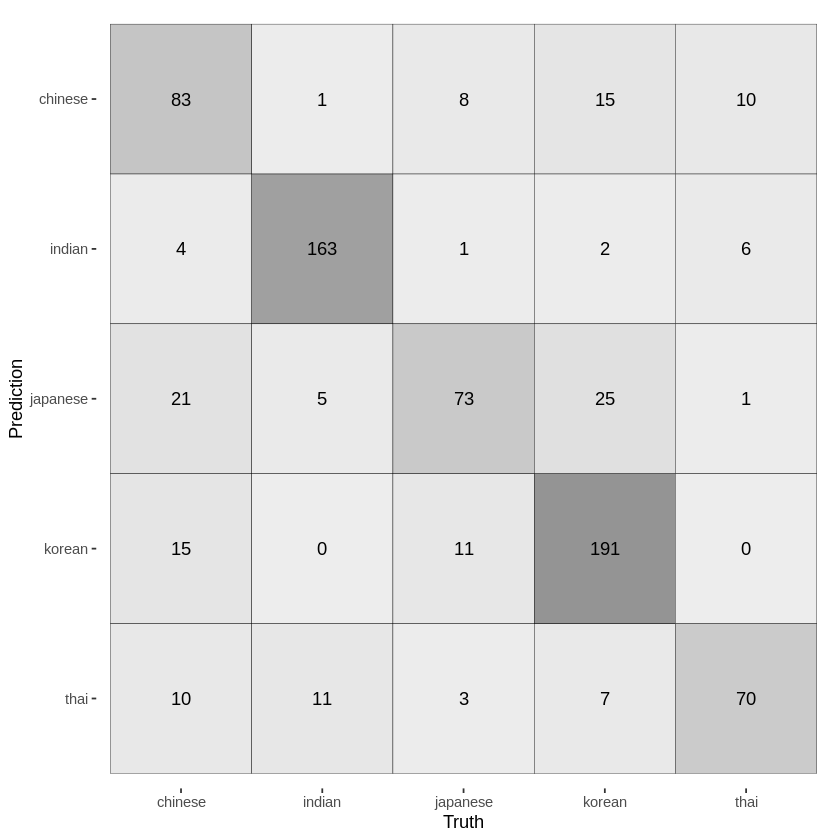

In [11]:
update_geom_defaults(geom = "tile", new = list(color = "black", alpha = 0.7))
# Visualize confusion matrix
results %>% 
  conf_mat(cuisine, .pred_class) %>% 
  autoplot(type = "heatmap")

കൺഫ്യൂഷൻ മാട്രിക്സ് പ്ലോട്ടിലെ ഇരുണ്ട ചതുരങ്ങൾ ഉയർന്ന കേസുകളുടെ എണ്ണം സൂചിപ്പിക്കുന്നു, പ്രവചിച്ച ലേബലും യഥാർത്ഥ ലേബലും ഒരുപോലെ ഉള്ള കേസുകൾ കാണിക്കുന്ന ഇരുണ്ട ചതുരങ്ങളുടെ ഡയഗണൽ വര കാണാൻ നിങ്ങൾക്ക് സാധിക്കുമെന്ന് പ്രതീക്ഷിക്കുന്നു.

ഇപ്പോൾ കൺഫ്യൂഷൻ മാട്രിക്സിനുള്ള സംഗ്രഹ സ്ഥിതിവിവരക്കണക്കുകൾ കണക്കാക്കാം.


In [12]:
# Summary stats for confusion matrix
conf_mat(data = results, truth = cuisine, estimate = .pred_class) %>% 
summary()

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7880435
kap,multiclass,0.7276583
sens,macro,0.7780927
spec,macro,0.9477598
ppv,macro,0.7585583
npv,macro,0.9460080
mcc,multiclass,0.7292724
j_index,macro,0.7258524
bal_accuracy,macro,0.8629262


നാം കൃത്യത, സെൻസിറ്റിവിറ്റി, പി.പി.വി പോലുള്ള ചില മെട്രിക്കുകൾക്ക് മാത്രം പരിധി കുറച്ചാൽ, തുടക്കത്തിന് മോശമല്ല 🥳!

## 4. കൂടുതൽ ആഴത്തിൽ പരിശോധിക്കൽ

ഒരു സൂക്ഷ്മമായ ചോദ്യം ചോദിക്കാം: പ്രവചിച്ച ഫലമായി ഒരു പ്രത്യേക ഭക്ഷണശൈലി തിരഞ്ഞെടുക്കാൻ ഉപയോഗിക്കുന്ന മാനദണ്ഡം എന്താണ്?

ശരി, ലൊജിസ്റ്റിക് റെഗ്രഷൻ പോലുള്ള സ്റ്റാറ്റിസ്റ്റിക്കൽ മെഷീൻ ലേണിംഗ് ആൽഗോരിതങ്ങൾ `സാധ്യത` അടിസ്ഥാനമാക്കിയുള്ളതാണ്; അതിനാൽ ക്ലാസിഫയർ പ്രവചിക്കുന്നത് സാദ്ധ്യമായ ഫലങ്ങളുടെ ഒരു സാദ്ധ്യത വിതരണമാണ്. ഏറ്റവും ഉയർന്ന സാദ്ധ്യതയുള്ള ക്ലാസ് പിന്നീട് നൽകിയ നിരീക്ഷണങ്ങൾക്ക് ഏറ്റവും സാധ്യതയുള്ള ഫലമായി തിരഞ്ഞെടുക്കപ്പെടുന്നു.

കഠിന ക്ലാസ് പ്രവചനങ്ങളും സാദ്ധ്യതകളും ഉണ്ടാക്കി ഇത് പ്രവർത്തനത്തിൽ കാണാം.


In [13]:
# Make hard class prediction and probabilities
results_prob <- cuisines_test %>%
  select(cuisine) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test)) %>% 
  bind_cols(mr_fit %>% predict(new_data = cuisines_test, type = "prob"))

# Print out results
results_prob %>% 
  slice_head(n = 5)

cuisine,.pred_class,.pred_chinese,.pred_indian,.pred_japanese,.pred_korean,.pred_thai
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
indian,thai,1.551259e-03,0.4587877,5.988039e-04,2.428503e-04,5.388194e-01
indian,indian,2.637133e-05,0.9999488,6.648651e-07,2.259993e-05,1.577948e-06
indian,indian,1.049433e-03,0.9909982,1.060937e-03,1.644947e-05,6.874989e-03
indian,indian,6.237482e-02,0.4763035,9.136702e-02,3.660913e-01,3.863391e-03
indian,indian,1.431745e-02,0.9418551,2.945239e-02,8.721782e-03,5.653283e-03


മികച്ചത്!

✅ മോഡൽ ആദ്യത്തെ നിരീക്ഷണം തായ് എന്ന് ഉറപ്പുള്ളതെന്തുകൊണ്ടെന്ന് വിശദീകരിക്കാമോ?

## **🚀ചലഞ്ച്**

ഈ പാഠത്തിൽ, നിങ്ങൾ ശുദ്ധീകരിച്ച ഡാറ്റ ഉപയോഗിച്ച് ഒരു മെഷീൻ ലേണിംഗ് മോഡൽ നിർമ്മിച്ചു, ഇത് ഒരു സീരീസ് ഘടകങ്ങളുടെ അടിസ്ഥാനത്തിൽ ഒരു ദേശീയ ഭക്ഷണശൈലി പ്രവചിക്കാനാകും. ഡാറ്റ ക്ലാസിഫൈ ചെയ്യാൻ Tidymodels നൽകുന്ന [വിവിധ ഓപ്ഷനുകൾ](https://www.tidymodels.org/find/parsnip/#models) വായിക്കാൻ ചില സമയം ചെലവഴിക്കൂ, കൂടാതെ മൾട്ടിനോമിയൽ റെഗ്രഷൻ ഫിറ്റ് ചെയ്യാനുള്ള [മറ്റു മാർഗങ്ങൾ](https://parsnip.tidymodels.org/articles/articles/Examples.html#multinom_reg-models) പരിശോധിക്കൂ.

#### നന്ദി:

[`Allison Horst`](https://twitter.com/allison_horst/) R-നെ കൂടുതൽ സ്വാഗതം ചെയ്യുന്നതും ആകർഷകവുമാക്കുന്ന അത്ഭുതകരമായ ചിത്രങ്ങൾ സൃഷ്ടിച്ചതിന്. അവളുടെ [ഗാലറി](https://www.google.com/url?q=https://github.com/allisonhorst/stats-illustrations&sa=D&source=editors&ust=1626380772530000&usg=AOvVaw3zcfyCizFQZpkSLzxiiQEM) സന്ദർശിക്കൂ.

[Cassie Breviu](https://www.twitter.com/cassieview)യും [Jen Looper](https://www.twitter.com/jenlooper)യും ഈ മോഡ്യൂളിന്റെ ഒറിജിനൽ പൈത്തൺ പതിപ്പ് സൃഷ്ടിച്ചതിന് ♥️

<br>
ചിരിപ്പിക്കാൻ ചില തമാശകൾ ചേർക്കാമായിരുന്നു, പക്ഷേ ഞാൻ ഭക്ഷണ പണികൾ മനസ്സിലാക്കുന്നില്ല 😅.

<br>

സന്തോഷകരമായ പഠനം,

[Eric](https://twitter.com/ericntay), ഗോൾഡ് മൈക്രോസോഫ്റ്റ് ലേൺ സ്റ്റുഡന്റ് അംബാസഡർ.


---

<!-- CO-OP TRANSLATOR DISCLAIMER START -->
**അസൂയാ**:  
ഈ രേഖ AI വിവർത്തന സേവനം [Co-op Translator](https://github.com/Azure/co-op-translator) ഉപയോഗിച്ച് വിവർത്തനം ചെയ്തതാണ്. നാം കൃത്യതയ്ക്ക് ശ്രമിച്ചിട്ടുണ്ടെങ്കിലും, സ്വയം പ്രവർത്തിക്കുന്ന വിവർത്തനങ്ങളിൽ പിശകുകൾ അല്ലെങ്കിൽ തെറ്റുകൾ ഉണ്ടാകാമെന്ന് ദയവായി ശ്രദ്ധിക്കുക. അതിന്റെ മാതൃഭാഷയിലുള്ള യഥാർത്ഥ രേഖയാണ് പ്രാമാണികമായ ഉറവിടം എന്ന് പരിഗണിക്കേണ്ടതാണ്. നിർണായകമായ വിവരങ്ങൾക്ക്, പ്രൊഫഷണൽ മനുഷ്യ വിവർത്തനം ശുപാർശ ചെയ്യപ്പെടുന്നു. ഈ വിവർത്തനം ഉപയോഗിക്കുന്നതിൽ നിന്നുണ്ടാകുന്ന ഏതെങ്കിലും തെറ്റിദ്ധാരണകൾക്കോ തെറ്റായ വ്യാഖ്യാനങ്ങൾക്കോ ഞങ്ങൾ ഉത്തരവാദികളല്ല.
<!-- CO-OP TRANSLATOR DISCLAIMER END -->
